In [1]:
import tensorflow as tf ## pip install tensorflow
import cv2 # pip install opencv-python
import os
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np # pip install numpy

In [2]:
img_array = cv2.imread("train/3/Training_58920903.jpg")

In [3]:
img_array.shape # rgb

(48, 48, 3)

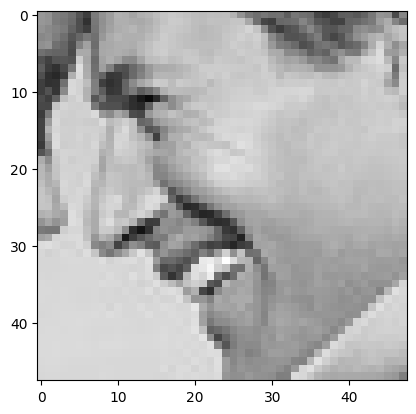

In [4]:
plt.imshow(img_array) # BGR

In [5]:
Datadirectory = "train" # training dataset

In [6]:
Classes = ["0", "1", "2", "3", "4", "5", "6"] # list of classes => exact name of your folders

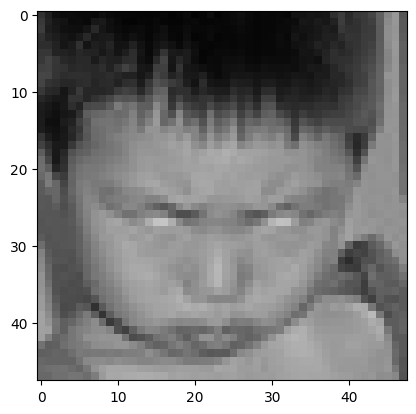

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break 

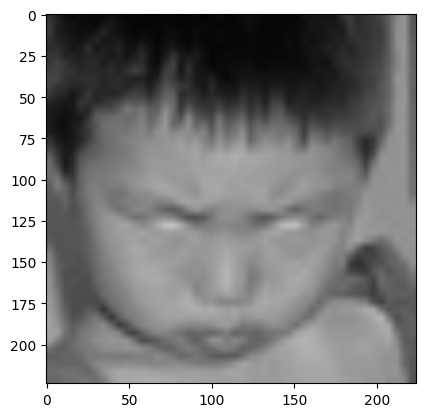

In [8]:
img_size = 224 # imagenet => 224 x 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

# read all the images and converting them to array

In [10]:
training_Data = [] #data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) #0 1, label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

10842


In [13]:
import random
random.shuffle(training_Data)

In [14]:
X = [] #data
y = [] #label

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) #converting it to 4 dimension

In [15]:
X.shape

(10842, 224, 224, 3)

In [16]:
Y = np.array(y)
Y.shape

(10842,)

In [17]:
# normalize the data
X = X/255.0 # normalizing it, 255 represents black, 0 represents white
# all color will be represented in range 0 - 1 after normalizing

# deep learning model for training - Transfer learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.MobileNetV2() #pre-trained model

In [20]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

Transfer Learning - Tuning, weights will start from last check point

In [21]:
base_input = model.layers[0].input # first layer ; input

In [22]:
base_output = model.layers[-2].output # last 2 layer globalpooling layer

In [23]:
final_output = layers.Dense(128)(base_output) #add new layer after the output
# of global pooling layer
final_output = layers.Activation("relu")(final_output) # activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(7,activation="softmax")(final_output)
# classes are 07, classification layer

In [24]:
final_output #output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [28]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
new_model.fit(X,Y, epochs = 5) #training don't run this, take 20minutes for 1 epoch

Epoch 1/5
339/339 [==============================] - 1251s 4s/step - loss: 1.3994 - accuracy: 0.4625
Epoch 2/5
339/339 [==============================] - 1271s 4s/step - loss: 1.1723 - accuracy: 0.5562
Epoch 3/5
339/339 [==============================] - 1237s 4s/step - loss: 1.0752 - accuracy: 0.5976
Epoch 4/5
339/339 [==============================] - 1257s 4s/step - loss: 0.9953 - accuracy: 0.6247
Epoch 5/5
339/339 [==============================] - 1276s 4s/step - loss: 0.9374 - accuracy: 0.6559


In [30]:
new_model.save("My_model_65p59.h5") # don't run this as well

# After training load the model and make predictions

In [27]:
new_model = tf.keras.models.load_model("My_model_65p59.h5")

In [69]:
frame = cv2.imread("supriseman.jpg")

In [70]:
frame.shape # 3 at the black represent BGR 3 colors

(185, 273, 3)

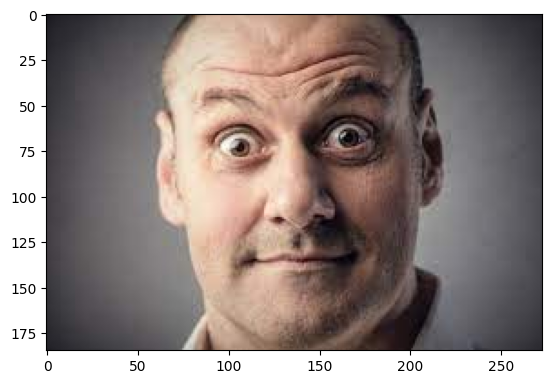

In [71]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# we need face detection algorithm (gray image)

In [72]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [73]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [74]:
gray.shape  #

(185, 273)

In [75]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2) #BGR
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

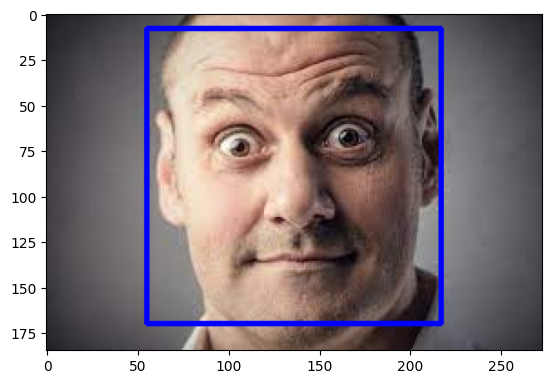

In [81]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

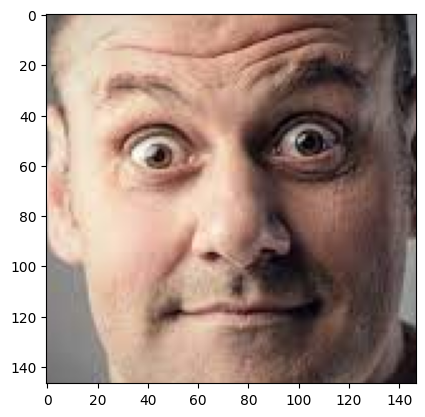

In [76]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [77]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0) # need 4th dimension
final_image = final_image/255.0 # normalizing

In [78]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 61ms/step


In [79]:
Predictions[0]

array([3.9472887e-03, 6.5650256e-06, 2.9359795e-02, 3.7151392e-05,
       1.3752035e-05, 9.6647781e-01, 1.5773096e-04], dtype=float32)

In [80]:
np.argmax(Predictions)

5

# Realtime video demo

In [ ]:
import tensorflow as tf ## pip install tensorflow
import cv2 # pip install opencv-python
import os
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np # pip install numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
new_model = tf.keras.models.load_model("My_model_65p59.h5")

In [ ]:
import cv2

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectanglebackground to white
rectangle_bgr = (255,255,255)
# make a black image
img = np.zeros((500,500))
# set some text
text = "some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness =1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width + 2,text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bar, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness = 1)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
#check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read() #read an image from a video
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    #Draw a rectangle around the faces
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
        print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0) # need 4th dimension
    final_image = final_image/255.0 # normalizing
    
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font1 = cv2.FONT_HERSHEY_SIMPLEX
    font2 = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(Predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.recctangle(frame,(x1, x1),(x1+w1, y1+h1), (0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font1,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font2,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.recctangle(frame,(x1, x1),(x1+w1, y1+h1), (0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font1,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font2,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.recctangle(frame,(x1, x1),(x1+w1, y1+h1), (0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font1,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font2,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.recctangle(frame,(x1, x1),(x1+w1, y1+h1), (0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font1,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font2,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==4):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.recctangle(frame,(x1, x1),(x1+w1, y1+h1), (0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font1,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font2,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    else:
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        #draw black background rectangle
        cv2.recctangle(frame,(x1, x1),(x1+w1, y1+h1), (0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font1,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font2,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
        
    cv2.imshow('Demo video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()